In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams.update({'font.size': 12})
import warnings
warnings.simplefilter(action='ignore')

## Feature Engineering for clean_data_train

#### FEATURE EXTRACTION

READ FILE CLEAN_DATA

In [35]:
df = pd.read_csv('clean_data_train.csv')
df_fe = df.copy()
df_fe

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,100,Quận Sơn Trà,NHÀ MẶT PHỐ,5,3.0,2.0,7.40
1,204,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,10,3.0,3.0,0.07
2,204,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,10,5.5,7.0,0.07
3,100,Quận Liên Chiểu,NHÀ ĐẤT THỔ CƯ,5,4.0,4.0,5.80
4,81,Quận Thanh Khê,NHÀ ĐẤT THỔ CƯ,5,3.0,2.0,5.90
...,...,...,...,...,...,...,...
1236,52,Quận Ngũ Hành Sơn,NHÀ MẶT PHỐ,5,2.0,2.0,3.15
1237,90,Quận Sơn Trà,NHÀ MẶT PHỐ,5,2.0,2.0,4.60
1238,60,Quận Liên Chiểu,NHÀ TRONG NGÕ,4,3.0,3.0,3.35
1239,85,Quận Liên Chiểu,NHÀ MẶT PHỐ,5,2.0,2.0,3.99


GET NUMERIC DATA AND CATEGORICAL DATA COLUMNS

In [36]:
numeric_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns # get all features whose data is numeric
categorical_cols = df_fe.select_dtypes(include=['object']).columns # get all features whose data is categorical

TARGET ENCODING FOLLOW MEAN OF 'GIÁ NHÀ (TỶ)'

In [38]:
target_means_kv = df_fe.groupby('Khu vực')['Giá nhà (Tỷ)'].mean()
target_means_mtvt = df_fe.groupby('Mô tả vị trí')['Giá nhà (Tỷ)'].mean()
# Map the target means back to the original data
df_fe['Khu vực'] = df_fe['Khu vực'].map(target_means_kv)
df_fe['Mô tả vị trí'] = df_fe['Mô tả vị trí'].map(target_means_mtvt)
# df_drop = df.drop(['Mô tả vị trí', 'Khu vực'], axis=1)
df_fe


,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,100,7.256747,7.039486,5,3.0,2.0,7.40
1,204,7.256747,2.505892,10,3.0,3.0,0.07
2,204,7.256747,2.505892,10,5.5,7.0,0.07
3,100,3.975871,4.367723,5,4.0,4.0,5.80
4,81,4.696981,4.367723,5,3.0,2.0,5.90
...,...,...,...,...,...,...,...
1236,52,6.842675,7.039486,5,2.0,2.0,3.15
1237,90,7.256747,7.039486,5,2.0,2.0,4.60
1238,60,3.975871,3.409114,4,3.0,3.0,3.35
1239,85,3.975871,7.039486,5,2.0,2.0,3.99


#### FEATURE TRANSFORMATION  

In [40]:
from scipy import stats
import pandas as pd
toScale = ['Khu vực', 'Mô tả vị trí' , 'Diện tích (m^2)', 'Mặt tiền (m)', 'Số phòng ngủ', 'WC']
df_trans = df_fe[toScale]
for col in toScale:
    df_trans[col],parameters=stats.boxcox(df_trans[col]+1)
df_trans

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC
0,919.144484,1.871133,6.446752,1.059701,1.373380,1.094093
1,919.144484,1.174991,7.849755,1.216570,1.373380,1.379104
2,919.144484,1.174991,7.849755,1.216570,1.848310,2.063292
3,129.004543,1.539896,6.446752,1.059701,1.592049,1.599752
4,218.098439,1.539896,6.059083,1.059701,1.373380,1.094093
...,...,...,...,...,...,...
1236,752.999497,1.871133,5.282376,1.059701,1.090491,1.094093
1237,919.144484,1.871133,6.251416,1.059701,1.090491,1.094093
1238,129.004543,1.373400,5.527495,0.999129,1.373380,1.379104
1239,129.004543,1.871133,6.146704,1.059701,1.090491,1.094093


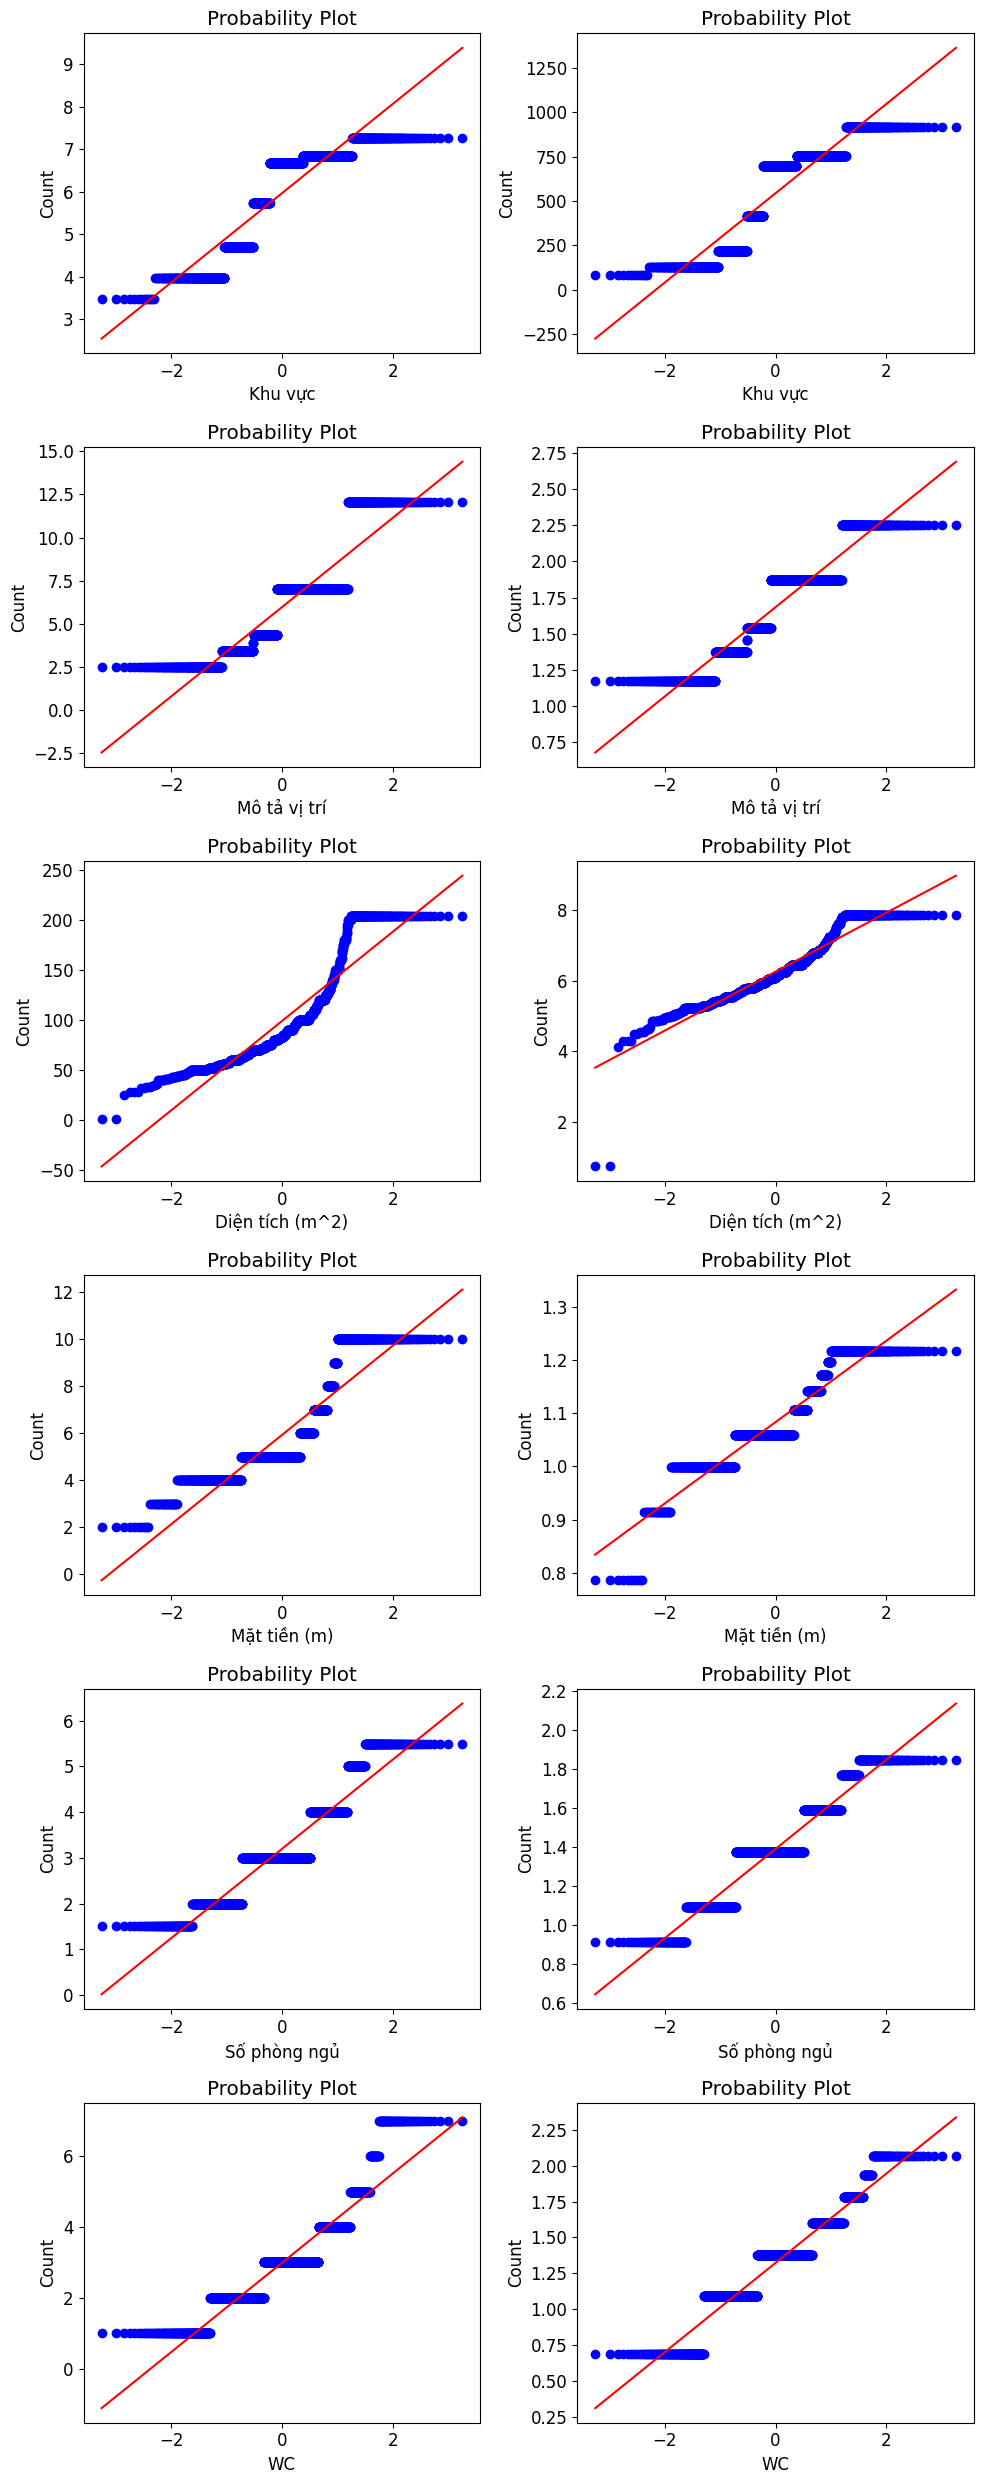

In [41]:
def prob_plot(df_before, df_after):
    plt.figure(figsize=(10, 25))
    j = 1
    for col in toScale:
        plt.subplot(len(toScale), 2, j)
        # plt.hist(df_before[col], bins=20, color='skyblue')
        stats.probplot(df_before[col], dist='norm', plot=plt)
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.subplot(len(toScale), 2, j+1)
        # plt.hist(df_after[col], bins=20, color='salmon')
        stats.probplot(df_after[col], dist='norm', plot=plt)
        plt.xlabel(col)
        plt.ylabel("Count")

        j += 2
    plt.tight_layout()
    plt.show()
prob_plot(df_fe, df_trans)

In [42]:
#STANDARD SCALER
standard = StandardScaler()
df_scaled = pd.DataFrame(standard.fit_transform(df_trans), columns=df_trans.columns)
df_scaled.head(5)

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC
0,1.372468,0.573959,0.226570,-0.291449,-0.070519,-0.711859
1,1.372468,-1.555137,1.852398,1.650472,-0.070519,0.171784
2,1.372468,-1.555137,1.852398,1.650472,1.908858,2.293030
3,-1.519977,-0.439103,0.226570,-0.291449,0.840833,0.855878
4,-1.193834,-0.439103,-0.222668,-0.291449,-0.070519,-0.711859


In [43]:
df_norm = pd.concat([df_scaled, df_fe['Giá nhà (Tỷ)']], axis=1)
df_norm

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,1.372468,0.573959,0.226570,-0.291449,-0.070519,-0.711859,7.40
1,1.372468,-1.555137,1.852398,1.650472,-0.070519,0.171784,0.07
2,1.372468,-1.555137,1.852398,1.650472,1.908858,2.293030,0.07
3,-1.519977,-0.439103,0.226570,-0.291449,0.840833,0.855878,5.80
4,-1.193834,-0.439103,-0.222668,-0.291449,-0.070519,-0.711859,5.90
...,...,...,...,...,...,...,...
1236,0.764265,0.573959,-1.122732,-0.291449,-1.249523,-0.711859,3.15
1237,1.372468,0.573959,0.000210,-0.291449,-1.249523,-0.711859,4.60
1238,-1.519977,-0.948317,-0.838683,-1.041276,-0.070519,0.171784,3.35
1239,-1.519977,0.573959,-0.121132,-0.291449,-1.249523,-0.711859,3.99


#### FEATURE SELECTION

CORRELATION MATRIX WITH HEATMAP

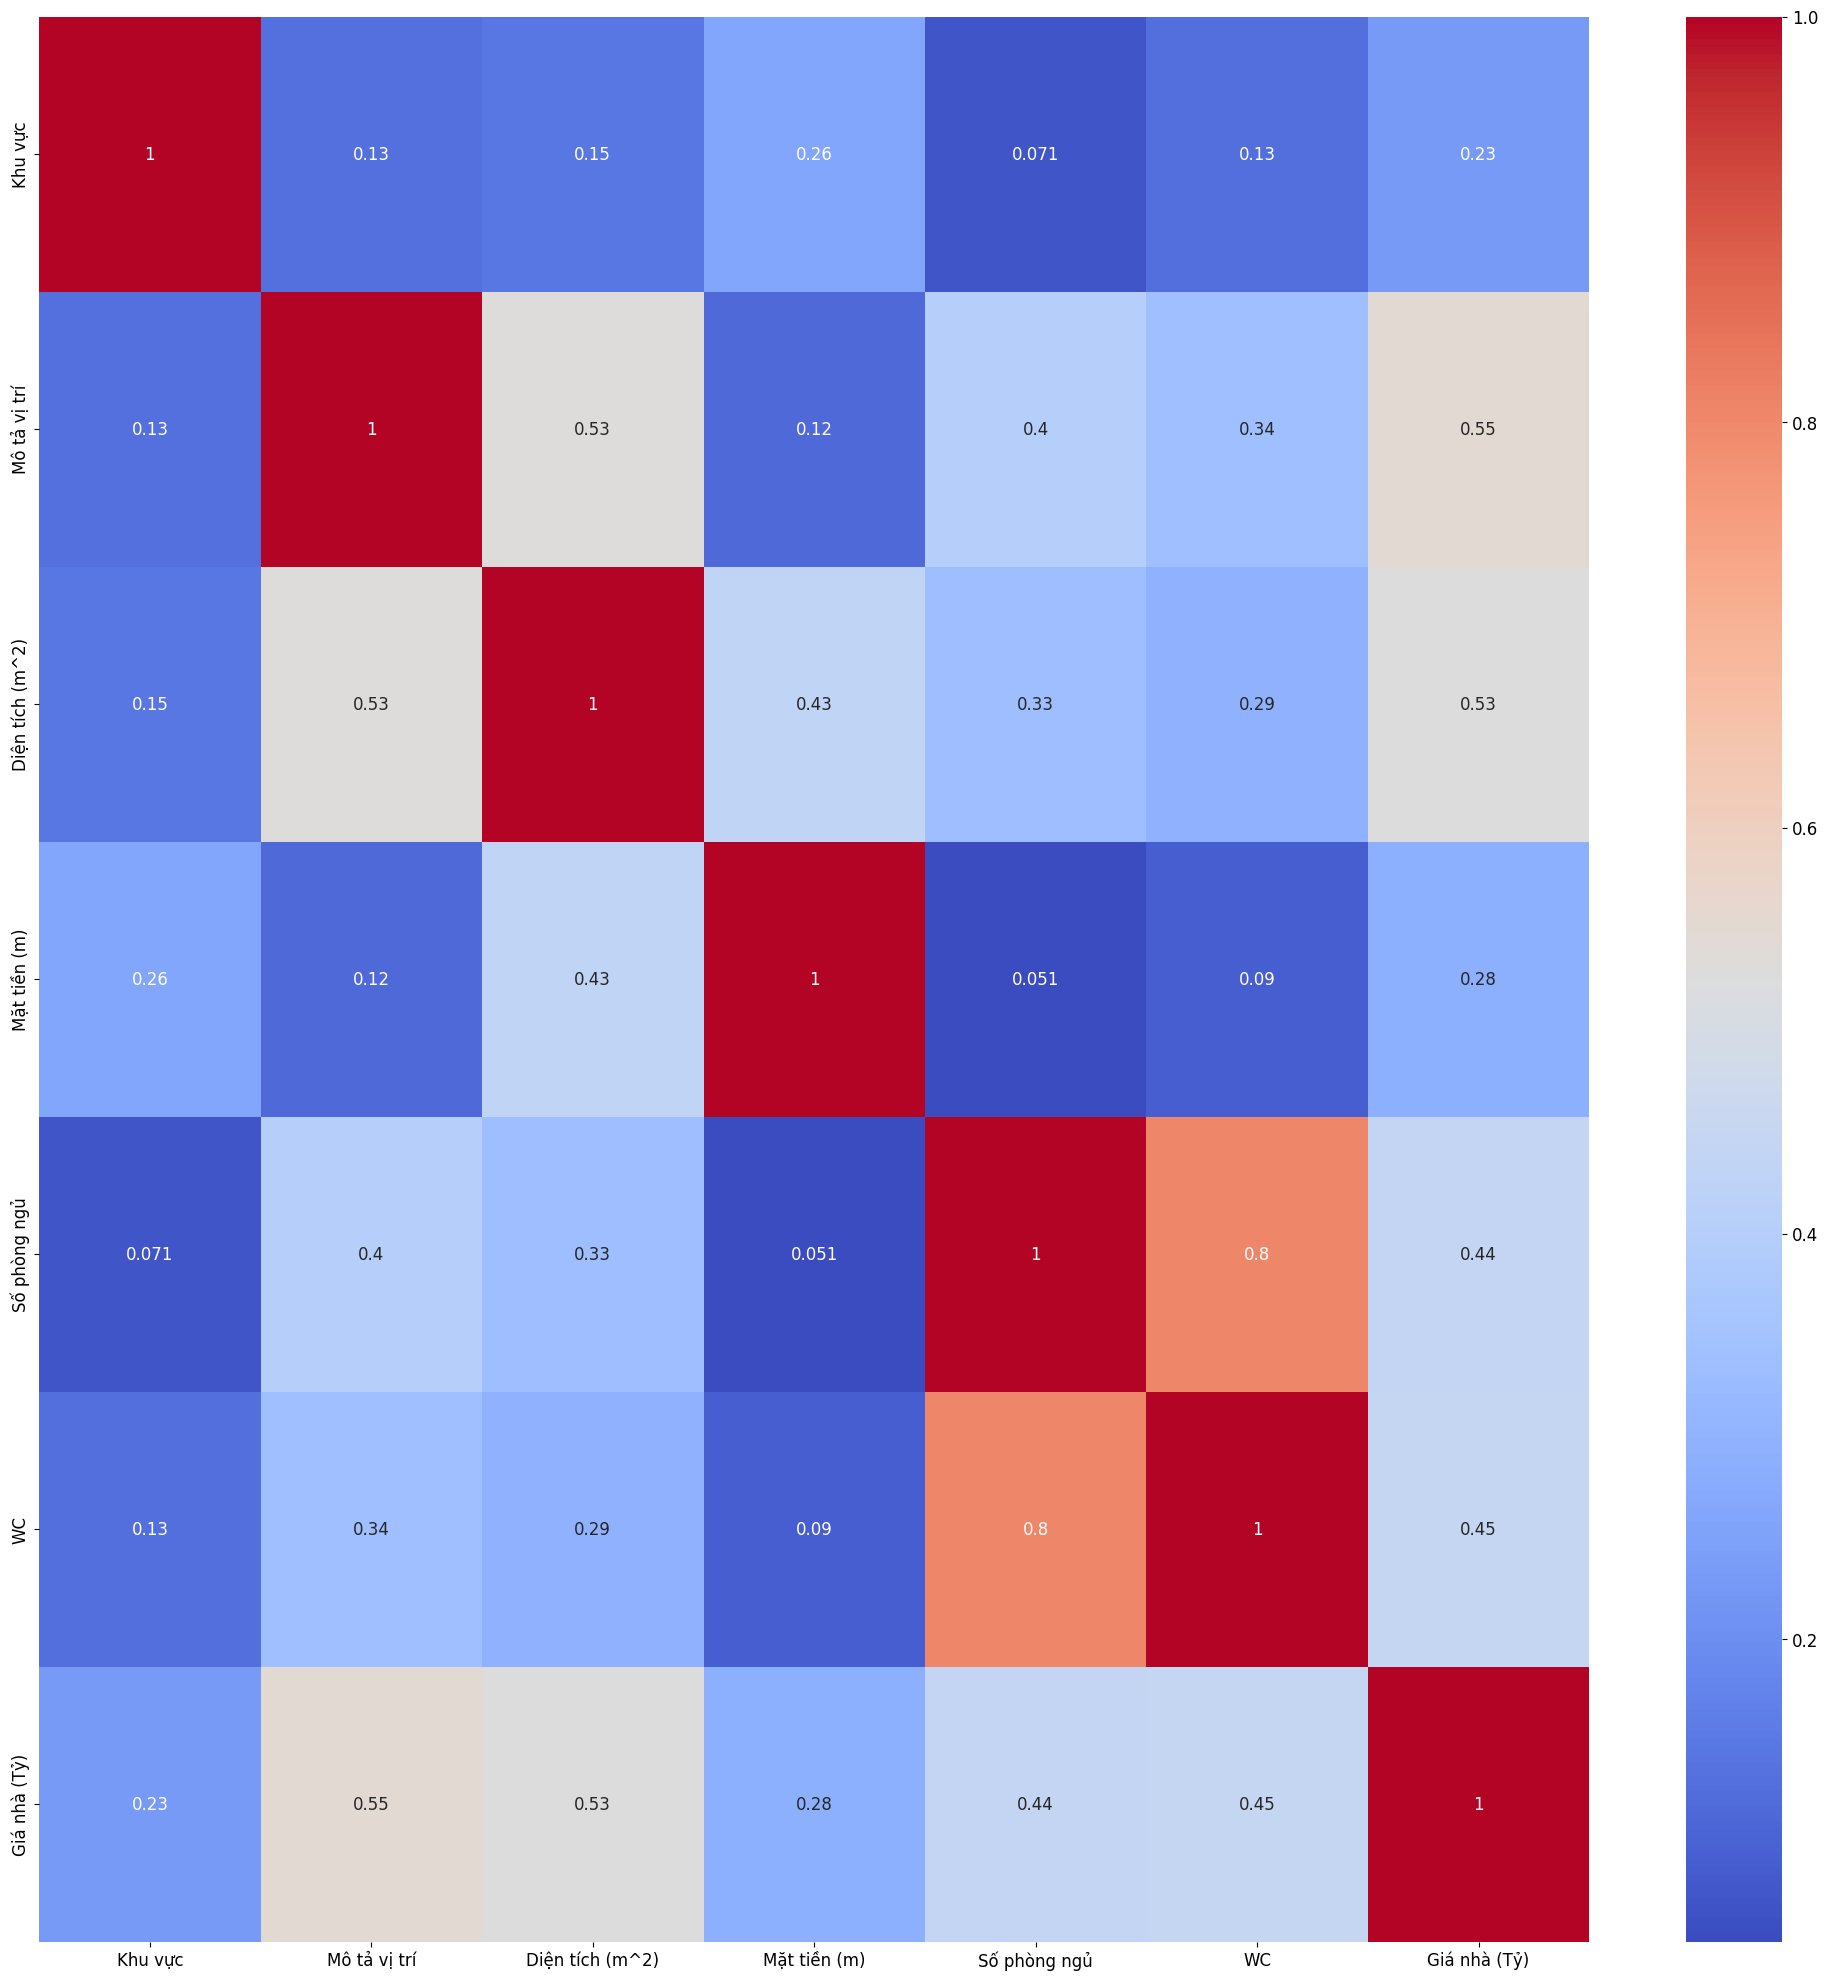

In [44]:
# corr = df_norm[['Diện tích (m^2)', 'Mặt tiền (m)', 'Số phòng ngủ', 'WC', 'Giá nhà (Tỷ)']].corr()
corr = df_norm[df_norm.columns].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [45]:
corr = df_norm[df_norm.columns].corr()
corr['Giá nhà (Tỷ)'].sort_values(ascending=False)

Giá nhà (Tỷ)       1.000000
Mô tả vị trí       0.549535
Diện tích (m^2)    0.528009
WC                 0.446258
Số phòng ngủ       0.442635
Mặt tiền (m)       0.284615
Khu vực            0.229915
Name: Giá nhà (Tỷ), dtype: float64

### Xuất csv

In [49]:
df_norm.to_csv("FE_data_train.csv", index=False)

In [50]:
df_norm

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,1.372468,0.573959,0.226570,-0.291449,-0.070519,-0.711859,7.40
1,1.372468,-1.555137,1.852398,1.650472,-0.070519,0.171784,0.07
2,1.372468,-1.555137,1.852398,1.650472,1.908858,2.293030,0.07
3,-1.519977,-0.439103,0.226570,-0.291449,0.840833,0.855878,5.80
4,-1.193834,-0.439103,-0.222668,-0.291449,-0.070519,-0.711859,5.90
...,...,...,...,...,...,...,...
1236,0.764265,0.573959,-1.122732,-0.291449,-1.249523,-0.711859,3.15
1237,1.372468,0.573959,0.000210,-0.291449,-1.249523,-0.711859,4.60
1238,-1.519977,-0.948317,-0.838683,-1.041276,-0.070519,0.171784,3.35
1239,-1.519977,0.573959,-0.121132,-0.291449,-1.249523,-0.711859,3.99


## Feature Engineering for clean_data_test

#### FEATURE EXTRACTION

READ FILE CLEAN_DATA

In [51]:
df = pd.read_csv('clean_data_test.csv')
df_fe = df.copy()
df_fe

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,46.0,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,10,1.5,1.0,2.20
1,199.5,Quận Ngũ Hành Sơn,"NHÀ BIỆT THỰ, LIỀN KỀ",10,4.0,4.0,13.42
2,100.0,Quận Ngũ Hành Sơn,NHÀ ĐẤT THỔ CƯ,5,3.0,3.0,4.30
3,64.0,Quận Hải Châu,NHÀ MẶT PHỐ,6,3.0,3.0,9.90
4,180.0,Quận Sơn Trà,"NHÀ BIỆT THỰ, LIỀN KỀ",10,4.0,4.0,12.90
...,...,...,...,...,...,...,...
185,140.0,Quận Sơn Trà,NHÀ MẶT PHỐ,5,5.5,7.0,18.00
186,199.5,Quận Sơn Trà,"NHÀ BIỆT THỰ, LIỀN KỀ",10,4.0,6.0,22.00
187,87.0,Quận Sơn Trà,NHÀ MẶT PHỐ,4,4.0,2.0,5.00
188,140.0,Quận Hải Châu,NHÀ MẶT PHỐ,6,5.0,5.0,6.00


GET NUMERIC DATA AND CATEGORICAL DATA COLUMNS

In [52]:
numeric_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns # get all features whose data is numeric
categorical_cols = df_fe.select_dtypes(include=['object']).columns # get all features whose data is categorical

TARGET ENCODING FOLLOW MEAN OF 'GIÁ NHÀ (TỶ)'

In [54]:
target_means_kv = df_fe.groupby('Khu vực')['Giá nhà (Tỷ)'].mean()
target_means_mtvt = df_fe.groupby('Mô tả vị trí')['Giá nhà (Tỷ)'].mean()
# Map the target means back to the original data
df_fe['Khu vực'] = df_fe['Khu vực'].map(target_means_kv)
df_fe['Mô tả vị trí'] = df_fe['Mô tả vị trí'].map(target_means_mtvt)
# df_drop = df.drop(['Mô tả vị trí', 'Khu vực'], axis=1)
df_fe


,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,46.0,8.099304,5.428222,10,1.5,1.0,2.20
1,199.5,10.412308,13.934130,10,4.0,4.0,13.42
2,100.0,10.412308,4.357609,5,3.0,3.0,4.30
3,64.0,8.986277,8.088348,6,3.0,3.0,9.90
4,180.0,8.099304,13.934130,10,4.0,4.0,12.90
...,...,...,...,...,...,...,...
185,140.0,8.099304,8.088348,5,5.5,7.0,18.00
186,199.5,8.099304,13.934130,10,4.0,6.0,22.00
187,87.0,8.099304,8.088348,4,4.0,2.0,5.00
188,140.0,8.986277,8.088348,6,5.0,5.0,6.00


#### FEATURE TRANSFORMATION  

In [56]:
from scipy import stats
import pandas as pd
toScale = ['Khu vực', 'Mô tả vị trí' , 'Diện tích (m^2)', 'Mặt tiền (m)', 'Số phòng ngủ', 'WC']
df_trans = df_fe[toScale]
for col in toScale:
    df_trans[col],parameters=stats.boxcox(df_trans[col]+1)
df_trans

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC
0,52.040861,1.804960,6.112947,0.828917,1.044999,0.710530
1,84.747981,2.587037,10.175913,0.828917,2.034817,1.705244
2,84.747981,1.633070,8.090693,0.770395,1.694906,1.456994
3,63.592619,2.128871,6.910032,0.789244,1.694906,1.456994
4,52.040861,2.587037,9.844061,0.828917,2.034817,1.705244
...,...,...,...,...,...,...
185,52.040861,2.128871,9.065321,0.770395,2.462699,2.241208
186,52.040861,2.587037,10.175913,0.828917,2.034817,2.087110
187,52.040861,2.128871,7.708984,0.743442,2.034817,1.142707
188,63.592619,2.128871,9.065321,0.789244,2.328802,1.911027


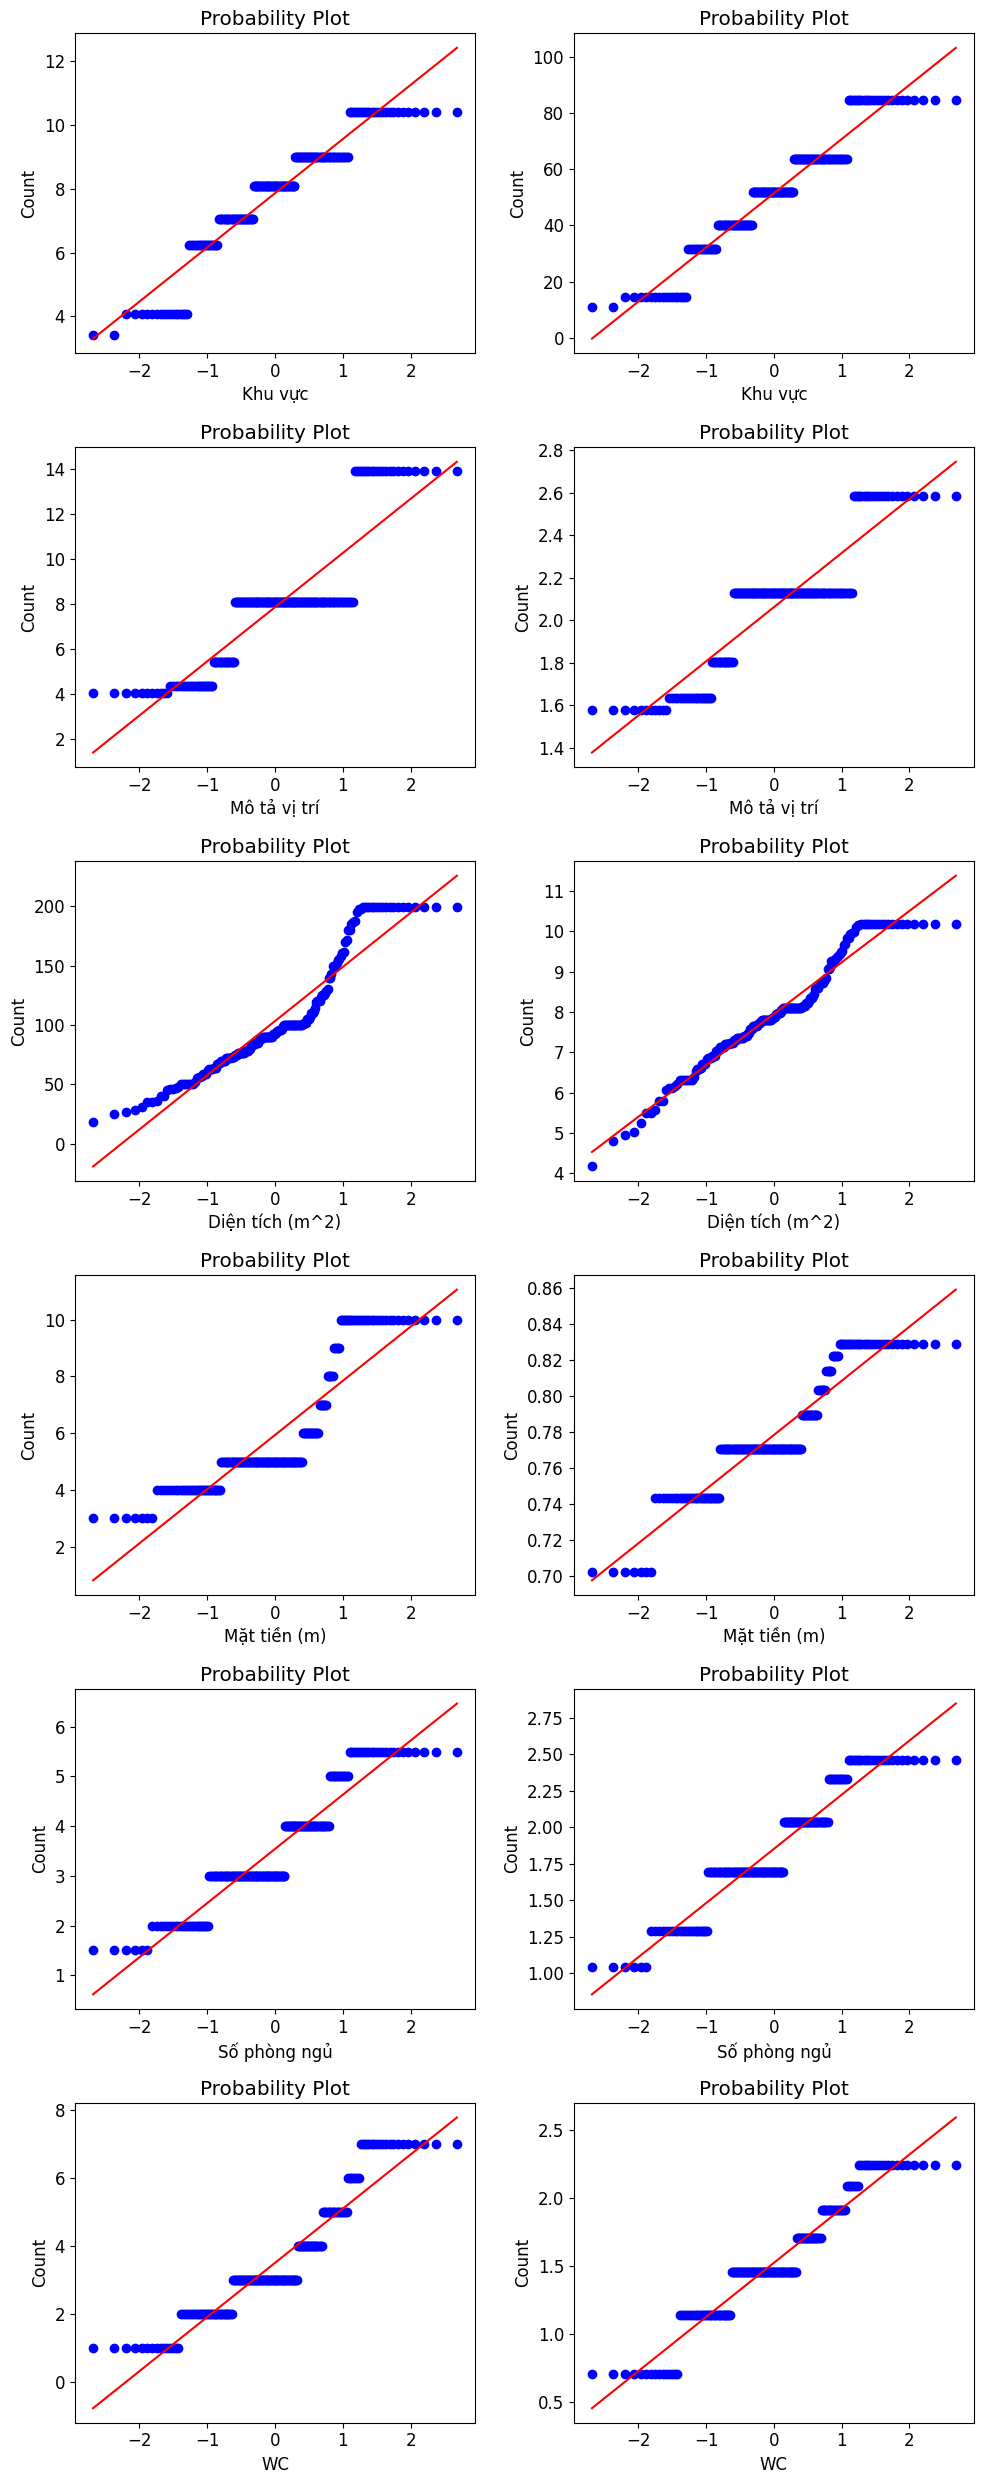

In [57]:
def prob_plot(df_before, df_after):
    plt.figure(figsize=(10, 25))
    j = 1
    for col in toScale:
        plt.subplot(len(toScale), 2, j)
        # plt.hist(df_before[col], bins=20, color='skyblue')
        stats.probplot(df_before[col], dist='norm', plot=plt)
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.subplot(len(toScale), 2, j+1)
        # plt.hist(df_after[col], bins=20, color='salmon')
        stats.probplot(df_after[col], dist='norm', plot=plt)
        plt.xlabel(col)
        plt.ylabel("Count")

        j += 2
    plt.tight_layout()
    plt.show()
prob_plot(df_fe, df_trans)

In [58]:
#STANDARD SCALER
standard = StandardScaler()
df_scaled = pd.DataFrame(standard.fit_transform(df_trans), columns=df_trans.columns)
df_scaled.head(5)

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC
0,0.028834,-0.917999,-1.433770,1.597921,-2.096746,-1.995583
1,1.687041,1.878484,1.726051,1.597921,0.477551,0.448552
2,1.687041,-1.532627,0.104348,-0.251199,-0.406482,-0.161430
3,0.614493,0.240213,-0.813867,0.344369,-0.406482,-0.161430
4,0.028834,1.878484,1.467965,1.597921,0.477551,0.448552


In [59]:
df_norm = pd.concat([df_scaled, df_fe['Giá nhà (Tỷ)']], axis=1)
df_norm

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,0.028834,-0.917999,-1.433770,1.597921,-2.096746,-1.995583,2.20
1,1.687041,1.878484,1.726051,1.597921,0.477551,0.448552,13.42
2,1.687041,-1.532627,0.104348,-0.251199,-0.406482,-0.161430,4.30
3,0.614493,0.240213,-0.813867,0.344369,-0.406482,-0.161430,9.90
4,0.028834,1.878484,1.467965,1.597921,0.477551,0.448552,12.90
...,...,...,...,...,...,...,...
185,0.028834,0.240213,0.862329,-0.251199,1.590378,1.765482,18.00
186,0.028834,1.878484,1.726051,1.597921,0.477551,1.386842,22.00
187,0.028834,0.240213,-0.192512,-1.102826,0.477551,-0.933671,5.00
188,0.614493,0.240213,0.862329,0.344369,1.242140,0.954186,6.00


#### FEATURE SELECTION

CORRELATION MATRIX WITH HEATMAP

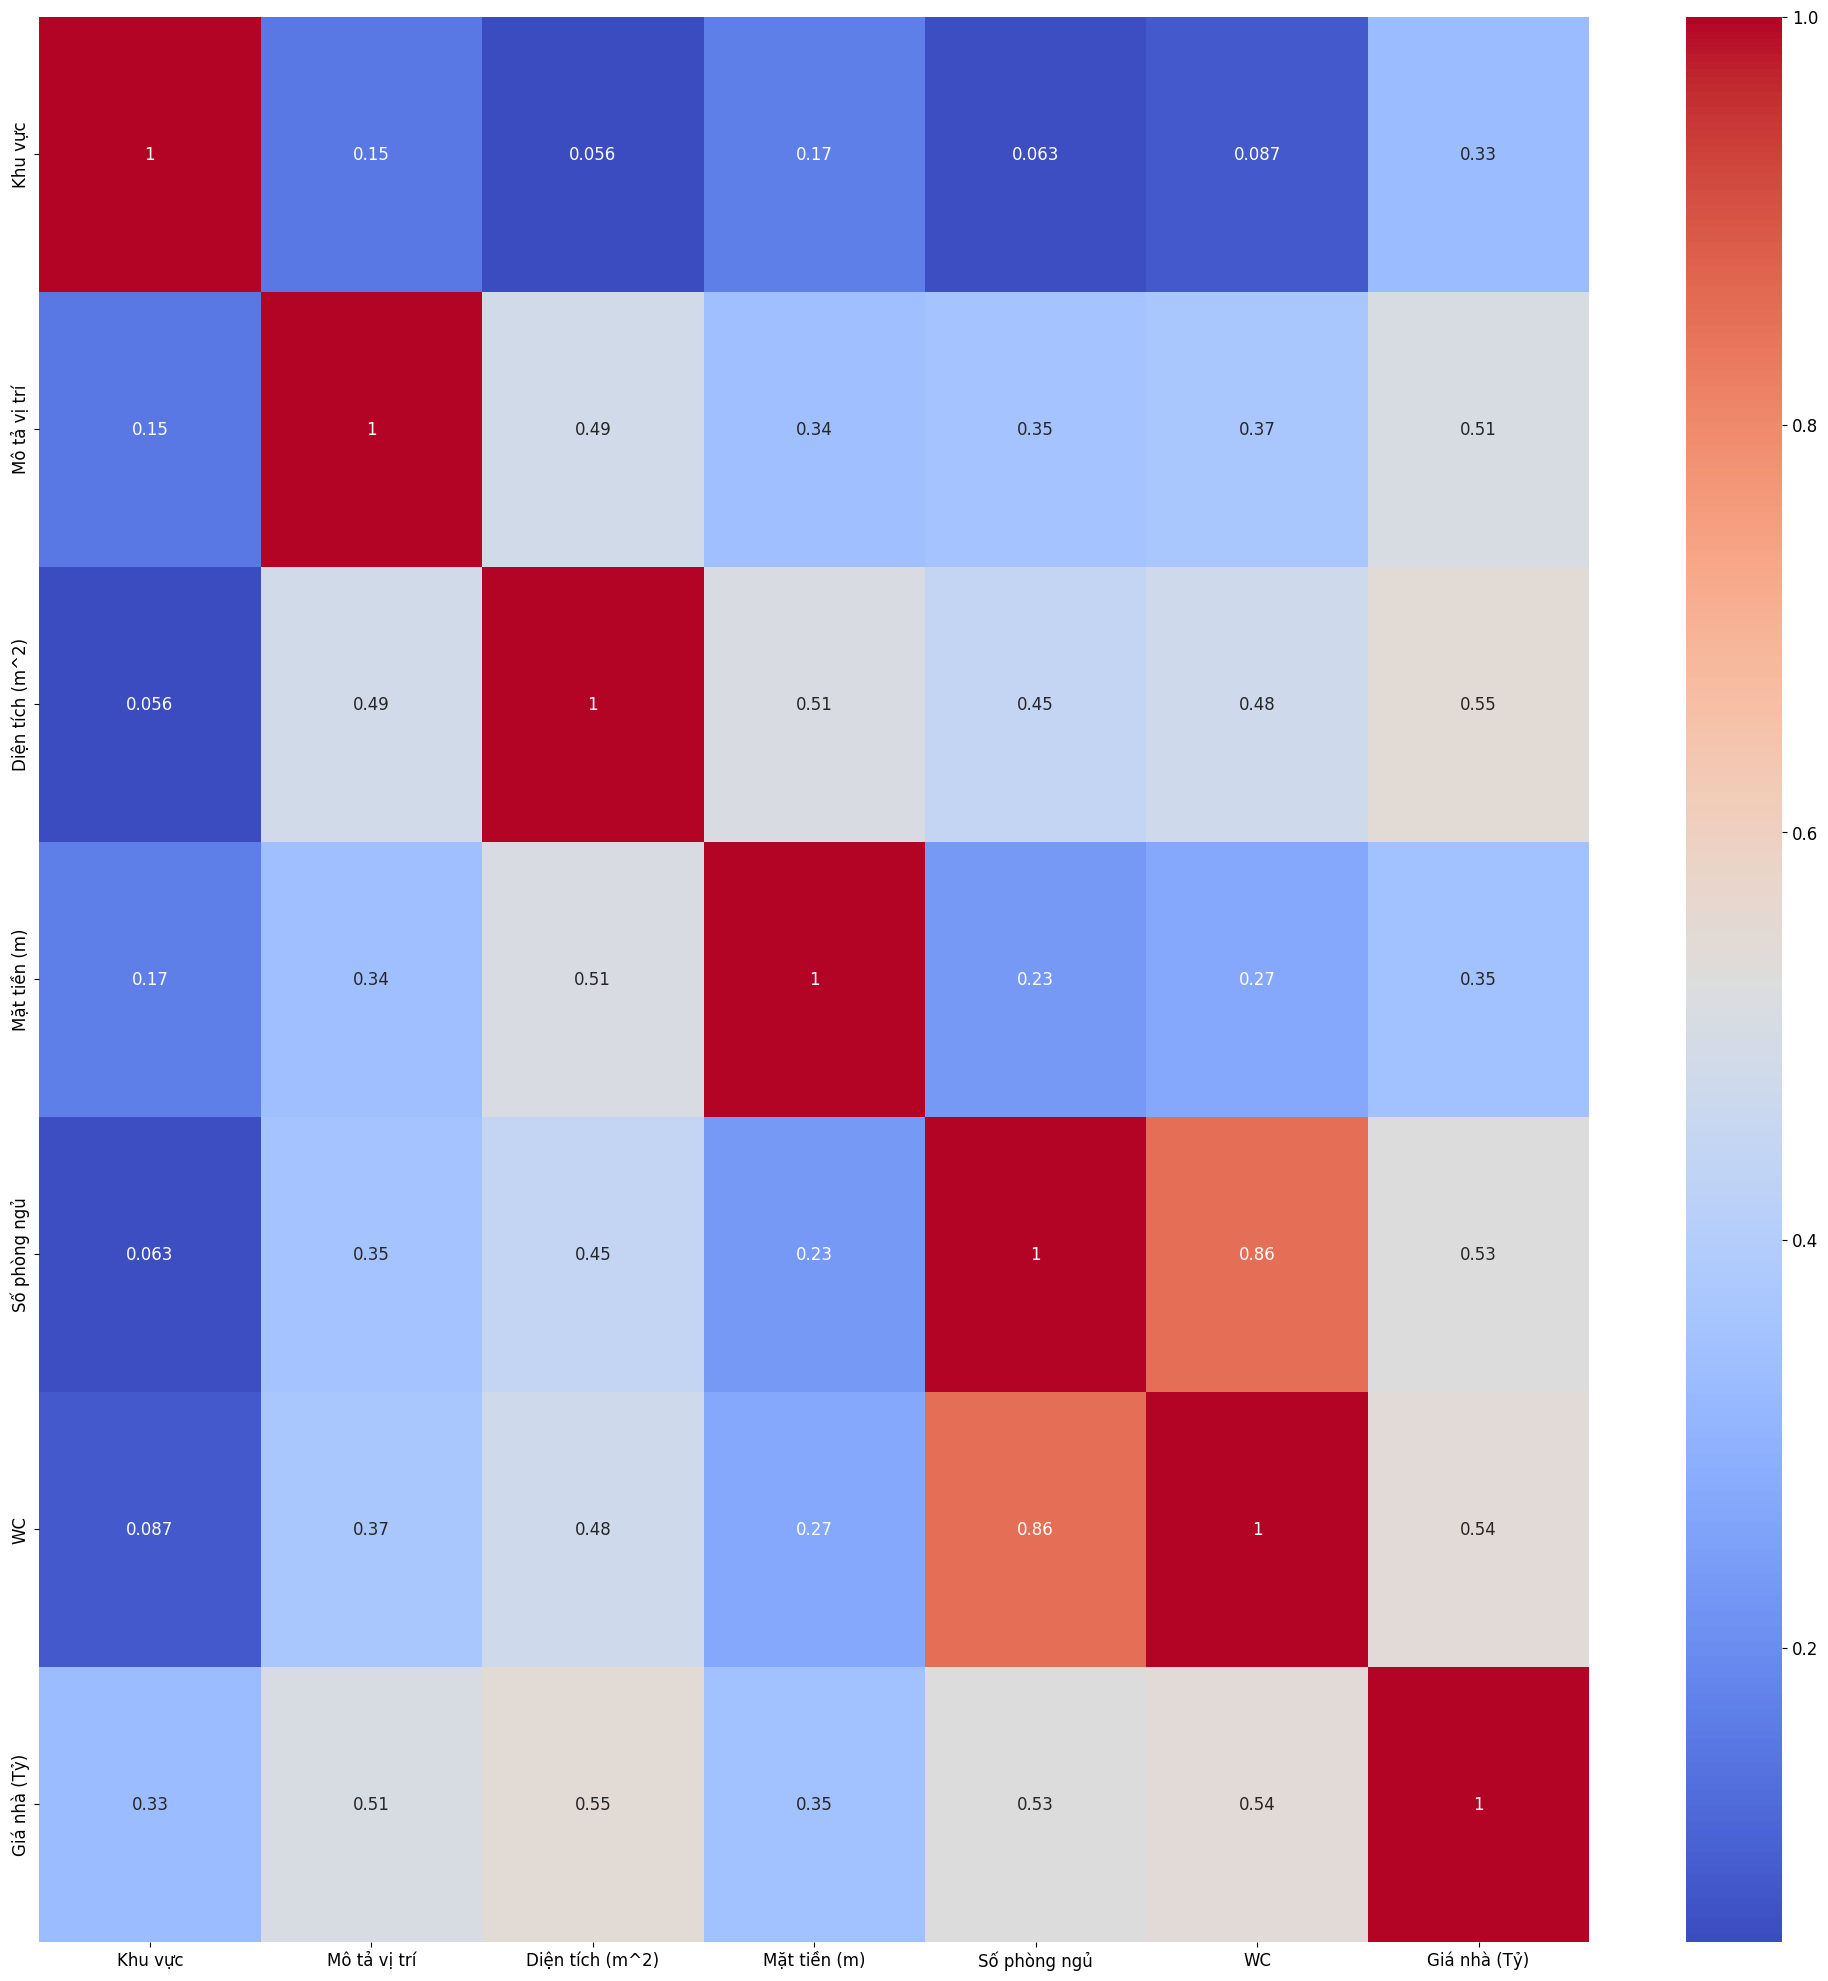

In [60]:
# corr = df_norm[['Diện tích (m^2)', 'Mặt tiền (m)', 'Số phòng ngủ', 'WC', 'Giá nhà (Tỷ)']].corr()
corr = df_norm[df_norm.columns].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [61]:
corr = df_norm[df_norm.columns].corr()
corr['Giá nhà (Tỷ)'].sort_values(ascending=False)

Giá nhà (Tỷ)       1.000000
Diện tích (m^2)    0.548847
WC                 0.544278
Số phòng ngủ       0.528947
Mô tả vị trí       0.506621
Mặt tiền (m)       0.350697
Khu vực            0.331109
Name: Giá nhà (Tỷ), dtype: float64

### Xuất csv

In [65]:
df_norm.to_csv("FE_data_test.csv", index=False)

In [66]:
df_norm

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,0.028834,-0.917999,-1.433770,1.597921,-2.096746,-1.995583,2.20
1,1.687041,1.878484,1.726051,1.597921,0.477551,0.448552,13.42
2,1.687041,-1.532627,0.104348,-0.251199,-0.406482,-0.161430,4.30
3,0.614493,0.240213,-0.813867,0.344369,-0.406482,-0.161430,9.90
4,0.028834,1.878484,1.467965,1.597921,0.477551,0.448552,12.90
...,...,...,...,...,...,...,...
185,0.028834,0.240213,0.862329,-0.251199,1.590378,1.765482,18.00
186,0.028834,1.878484,1.726051,1.597921,0.477551,1.386842,22.00
187,0.028834,0.240213,-0.192512,-1.102826,0.477551,-0.933671,5.00
188,0.614493,0.240213,0.862329,0.344369,1.242140,0.954186,6.00
